In [86]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

%load_ext autoreload
%autoreload 2
from utils import *

# Convert OpenPose frames to a numpy array
res = json2np("keypoints")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


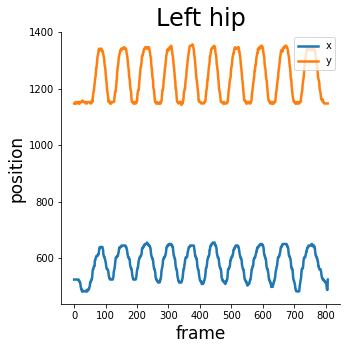

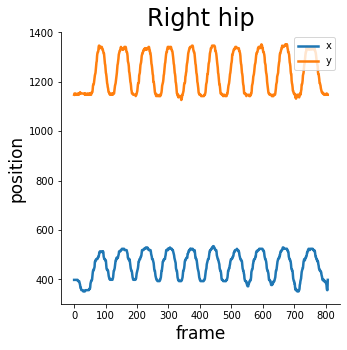

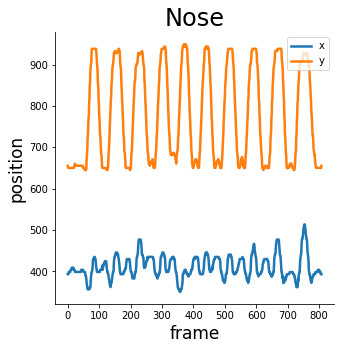

In [35]:
# Features to plot for diagnostics
PLOT_COLS = {
    "Left knee": LKNE,
    "Right knee": RKNE,
    "Left hip": LHIP,
    "Right hip": RHIP,
    "Nose": NOSE,
}

for name, col in PLOT_COLS.items():
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(name,fontsize=24)
    plt.xlabel("frame",fontsize=17)
    plt.ylabel("position",fontsize=17)
    plt.plot(res[:,[col*3,]], linestyle="-", linewidth=2.5)
    plt.plot(res[:,[col*3+1,]], linestyle="-", linewidth=2.5)
    plt.legend(['x', 'y'],loc=1)

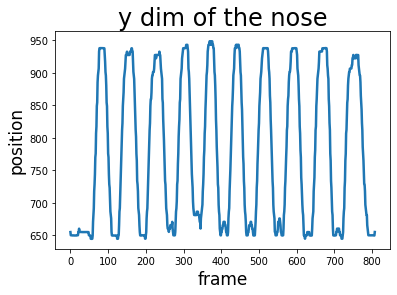

In [80]:
# Detect peaks in the nose signal
nose_y = res[:,[NOSE*3+1,]]
plt.title("y dim of the nose",fontsize=24)
plt.xlabel("frame",fontsize=17)
plt.ylabel("position",fontsize=17)
plt.plot(nose_y, linestyle="-", linewidth=2.5)

/mnt/workspace/home/kidzik/workspace/motionlab-analysis/utils.py:122: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(maxtab), array(mintab)


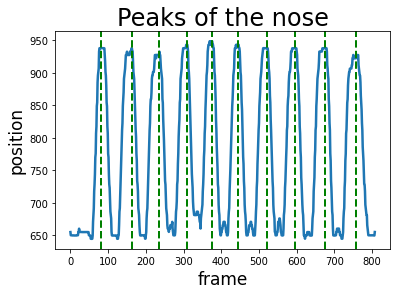

Number of sit-to-stands = 10
Time ~ 25.11s


In [93]:
peaks,_ = peakdet(nose_y, 50)
plt.title("Peaks of the nose",fontsize=24)
plt.xlabel("frame",fontsize=17)
plt.ylabel("position",fontsize=17)
plt.plot(nose_y, linestyle="-", linewidth=2.5)
for i in range(peaks.shape[0]):
    plt.axvline(x=peaks[i,0],linewidth=2, color='g', linestyle="--")
plt.show()

n = peaks.shape[0]

print("Number of sit-to-stands = {}".format(n))
first = peaks[0,0]
last = peaks[n-1,0]

# Approximated 
time = n*(last-first)/((n-1)*FPS)
print("Time ~ {}s".format( round(time,2) ))

# TODO we can get a better estimate of breaks from multiple signals at once
breaks = peaks[:,0]

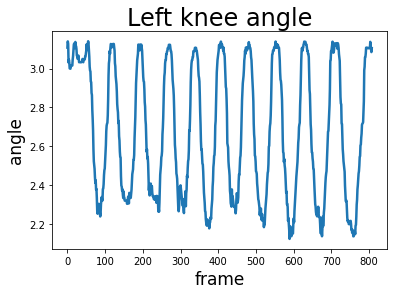

In [91]:
lkneeangle = get_angle(LANK, LKNE, LHIP, res)
plt.title("Left knee angle",fontsize=24)
plt.xlabel("frame",fontsize=17)
plt.ylabel("angle",fontsize=17)
plt.plot(lkneeangle, linestyle="-", linewidth=2.5)
plt.show()

Text(0.5, 1.0, 'L knee flex of sit-to-stands')

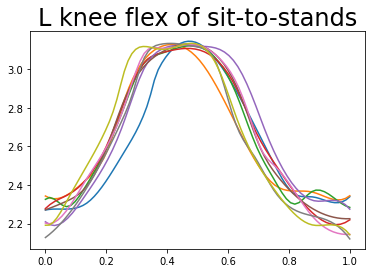

In [107]:
from scipy.interpolate import interp1d, splrep, splev
for i in range(len(breaks)-1):
    x = np.linspace(0, 1, num=breaks[i+1] - breaks[i], endpoint=True)
    y = lkneeangle[breaks[i]:breaks[i+1]]
    f = splrep(x, y, s=0.03)
    xplot = np.linspace(0, 1, num=breaks[i+1] - breaks[i], endpoint=True)
    plt.plot(xplot, splev(xplot, f))
plt.title("L knee flex of sit-to-stands",fontsize=24)